In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels.api as sm

In [14]:
df=pd.read_csv('mtcars2.txt',sep='\t', decimal=',')
df

,modello,consumo,cilindrata,peso,test400metri,trasmissione,marce,cilindri
0,Mazda RX4,21.0,110,2.620,16.46,1,4,6
1,Mazda RX4 Wag,21.0,110,2.875,17.02,1,4,6
2,Datsun 710,22.8,93,2.320,18.61,1,4,4
3,Hornet 4 Drive,21.4,110,3.215,19.44,0,3,6
4,Hornet Sportabout,18.7,175,3.440,17.02,0,3,8
5,Valiant,18.1,105,3.460,20.22,0,3,6
6,Duster 360,14.3,245,3.570,15.84,0,3,8
7,Merc 240D,24.4,62,3.190,20.00,0,4,4
8,Merc 230,22.8,95,3.150,22.90,0,4,4
9,Merc 280,19.2,123,3.440,18.30,0,4,6


In [15]:
len(df)

32

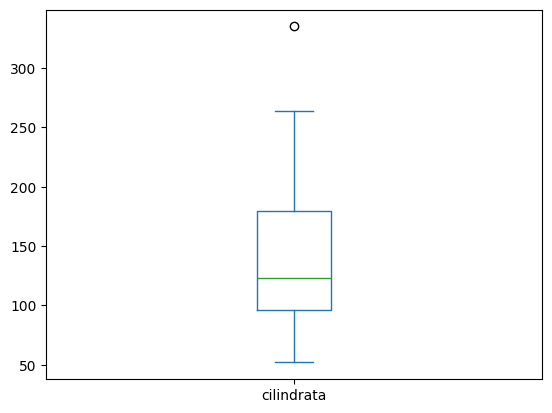

In [17]:
cilindrata=df['cilindrata']
cilindrata.plot.box()
plt.show()

In [18]:
cilindrata.describe()

count     32.000000
mean     146.687500
std       68.562868
min       52.000000
25%       96.500000
50%      123.000000
75%      180.000000
max      335.000000
Name: cilindrata, dtype: float64

In [23]:
cilindrata.quantile(.75)-cilindrata.quantile(.25)

83.5

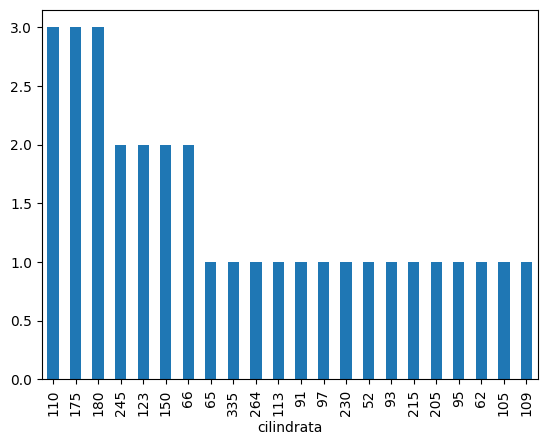

In [32]:
cilindrata.value_counts().plot.bar()
plt.show()

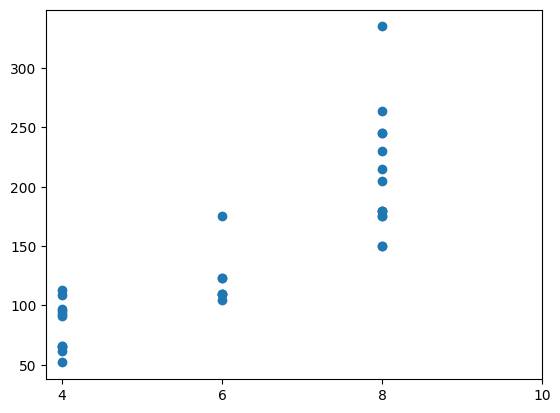

In [41]:
cilindri=df['cilindri'].dropna()
cilindrata=df['cilindrata'].dropna()
x=np.arange(4,12,2)
plt.scatter(cilindri,cilindrata)
plt.xticks(x)
plt.show()

In [42]:
cilindri.corr(cilindrata)

0.8324474527218194

In [43]:
cilindrata.mean()

146.6875

In [44]:
cilindrata.std()

68.56286848932059

In [183]:
valoriSimulati=[]
for i in range(32):
    valoriSimulati.append(st.norm.rvs(loc=cilindrata.mean(),scale=cilindrata.std()))
valoriSimulati.sort()
valoriSimulatiSorted=(pd.Series(valoriSimulati))

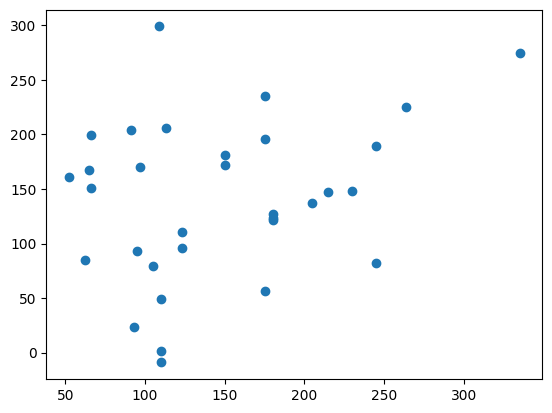

In [184]:
plt.scatter(cilindrata,valoriSimulati)
plt.show()

In [185]:
cilindrataSorted=pd.Series(cilindrata.sort_values()).reset_index()['cilindrata']

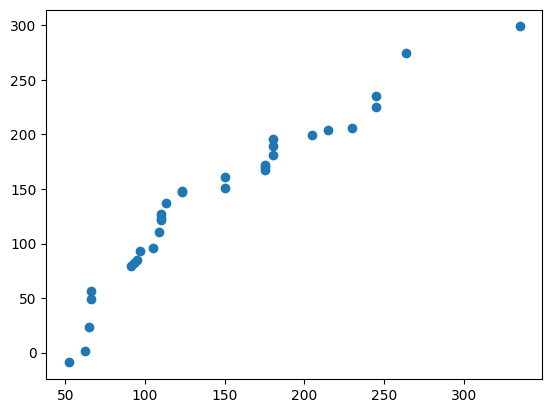

In [186]:
plt.scatter(cilindrataSorted,valoriSimulatiSorted)
plt.show()

In [187]:
cilindrataSorted.corr(valoriSimulatiSorted)

0.9563237919513906

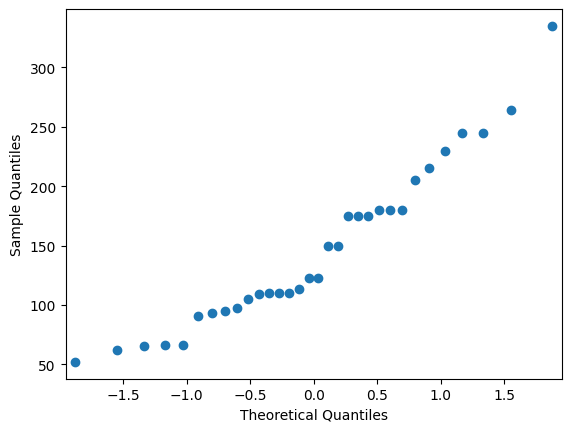

In [194]:
sm.qqplot(cilindrata,dist=st.norm())
plt.show()

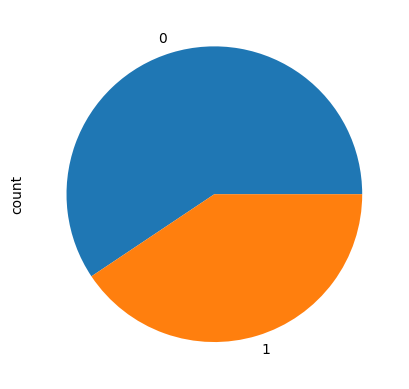

In [188]:
trasmissione=df['trasmissione'].value_counts()
trasmissione.plot.pie()
plt.show()

In [197]:
tr=df['trasmissione']
tr.mean()

0.40625

In [198]:
len(tr)

32

In [199]:
trasmissione

trasmissione
0    19
1    13
Name: count, dtype: int64

In [204]:
19/(13+19)

0.59375

In [208]:
import math
dist=st.norm()
(tr.std()/math.sqrt(32))*dist.ppf((0.85+1)/2)

0.12698102114579055